In [80]:
import gzip
import json
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
import networkx as nx
from networkx.algorithms import approximation
from networkx.algorithms import bipartite

In [4]:
with gzip.open("../data/DigIC_dataset/counter/1/counter.json.gz", 'rb') as f:
    design = json.loads(f.read().decode('utf-8'))

In [5]:
design

{'instances': [{'name': 'clk_gate_value_reg/latch',
   'id': 0,
   'xloc': 2560,
   'yloc': 7680,
   'cell': 23,
   'orient': 0},
  {'name': 'value_reg_0_',
   'id': 1,
   'xloc': 512,
   'yloc': 4608,
   'cell': 65,
   'orient': 0},
  {'name': 'value_reg_2_',
   'id': 2,
   'xloc': 768,
   'yloc': 7680,
   'cell': 65,
   'orient': 6},
  {'name': 'value_reg_1_',
   'id': 3,
   'xloc': 3584,
   'yloc': 4608,
   'cell': 65,
   'orient': 6},
  {'name': 'U20',
   'id': 4,
   'xloc': 7424,
   'yloc': 4608,
   'cell': 58,
   'orient': 6},
  {'name': 'U21',
   'id': 5,
   'xloc': 6272,
   'yloc': 7680,
   'cell': 48,
   'orient': 6},
  {'name': 'U22', 'id': 6, 'xloc': 6784, 'yloc': 7680, 'cell': 7, 'orient': 6},
  {'name': 'U23',
   'id': 7,
   'xloc': 5760,
   'yloc': 7680,
   'cell': 48,
   'orient': 2},
  {'name': 'U24',
   'id': 8,
   'xloc': 6912,
   'yloc': 4608,
   'cell': 42,
   'orient': 4},
  {'name': 'U25', 'id': 9, 'xloc': 6400, 'yloc': 4608, 'cell': 7, 'orient': 4},
  {'name': 'U

In [6]:
with gzip.open("../data/DigIC_dataset/cells.json.gz", 'rb') as f:
    cells = json.loads(f.read().decode('utf-8'))

In [7]:
cells[7]

{'name': 'AOI21_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 7}

In [9]:
conn = np.load("../data/DigIC_dataset/counter/1/counter_connectivity.npz")

In [10]:
coo = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])

In [11]:
counter_coo = coo.toarray()

In [12]:
print(counter_coo.shape)
print(counter_coo)

(23, 28)
[[1 0 0 0 0 0 3 0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 2 0 0 0 0 6 0 5 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 3 0 6 0 0 0 5 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 6 0 0 5 0 0 0 0 1 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 4 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [13]:
am = (np.dot(counter_coo, counter_coo.T) > 0).astype(int)
np.fill_diagonal(am, 0)

In [14]:
print(am)

[[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 1 

In [15]:
g = nx.from_numpy_array(am)

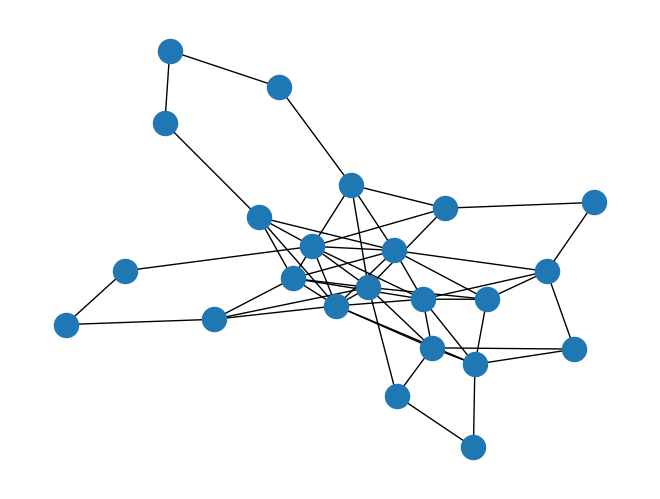

In [16]:
nx.draw(g)

In [17]:
counter_instance_names = {idx: i['name'] for idx, i in enumerate(design['instances'])}
counter_instance_names

{0: 'clk_gate_value_reg/latch',
 1: 'value_reg_0_',
 2: 'value_reg_2_',
 3: 'value_reg_1_',
 4: 'U20',
 5: 'U21',
 6: 'U22',
 7: 'U23',
 8: 'U24',
 9: 'U25',
 10: 'U26',
 11: 'U28',
 12: 'U27',
 13: 'U29',
 14: 'ropt_h_inst_941',
 15: 'copt_h_inst_790',
 16: 'copt_h_inst_791',
 17: 'copt_h_inst_793',
 18: 'copt_h_inst_794',
 19: 'copt_h_inst_795',
 20: 'copt_h_inst_796',
 21: 'ropt_h_inst_942',
 22: 'ropt_h_inst_943'}

In [18]:
g = nx.relabel_nodes(g, counter_instance_names)

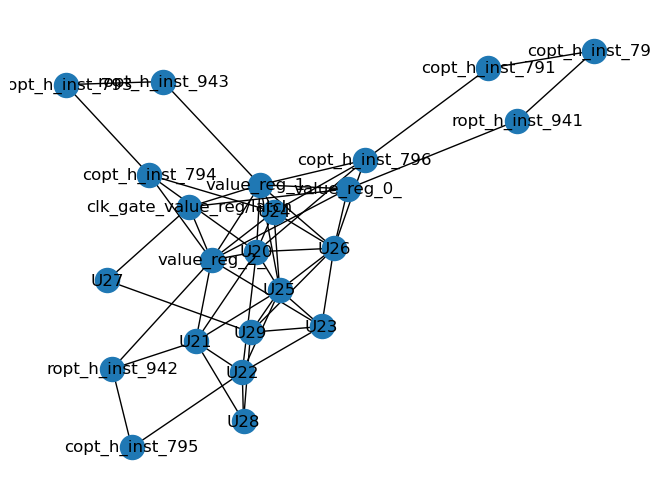

In [19]:
nx.draw(g, with_labels=True)

In [20]:
approximation.all_pairs_node_connectivity(g)

{'clk_gate_value_reg/latch': {'value_reg_0_': 4,
  'value_reg_2_': 4,
  'value_reg_1_': 4,
  'U20': 4,
  'U21': 4,
  'U22': 4,
  'U23': 4,
  'U24': 4,
  'U25': 4,
  'U26': 4,
  'U28': 3,
  'U27': 2,
  'U29': 4,
  'ropt_h_inst_941': 2,
  'copt_h_inst_790': 2,
  'copt_h_inst_791': 2,
  'copt_h_inst_793': 2,
  'copt_h_inst_794': 3,
  'copt_h_inst_795': 2,
  'copt_h_inst_796': 4,
  'ropt_h_inst_942': 3,
  'ropt_h_inst_943': 2},
 'value_reg_0_': {'clk_gate_value_reg/latch': 4,
  'value_reg_2_': 5,
  'value_reg_1_': 5,
  'U20': 5,
  'U21': 4,
  'U22': 4,
  'U23': 5,
  'U24': 5,
  'U25': 5,
  'U26': 5,
  'U28': 3,
  'U27': 2,
  'U29': 5,
  'ropt_h_inst_941': 2,
  'copt_h_inst_790': 2,
  'copt_h_inst_791': 2,
  'copt_h_inst_793': 2,
  'copt_h_inst_794': 3,
  'copt_h_inst_795': 2,
  'copt_h_inst_796': 5,
  'ropt_h_inst_942': 3,
  'ropt_h_inst_943': 2},
 'value_reg_2_': {'clk_gate_value_reg/latch': 4,
  'value_reg_0_': 5,
  'value_reg_1_': 8,
  'U20': 8,
  'U21': 6,
  'U22': 6,
  'U23': 5,
  'U2

In [21]:
am_edges = (np.dot(counter_coo.T, counter_coo) > 0).astype(int)
np.fill_diagonal(am_edges, 0)
print(am_edges)

[[0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 

In [22]:
am.shape

(23, 23)

In [23]:
def is_sym(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    if rows != cols:
        return False
    
    for i in range(rows):
        for j in range(cols):
            if i != j and matrix[i][j] != matrix[j][i]:
                print(i, j)
                return False
    
    return True

In [24]:
is_sym(am)

True

In [25]:
am_edges.shape

(28, 28)

In [26]:
am_bipartite = np.vstack((np.hstack((np.zeros((23,23), dtype=int), counter_coo)),np.hstack((counter_coo.T, np.zeros((28, 28),dtype=int)))))
am_bipartite = (am_bipartite > 0).astype(int)

In [27]:
g_bipart = nx.from_numpy_array(am_bipartite)

In [28]:
bipartite.is_bipartite(g_bipart)

True

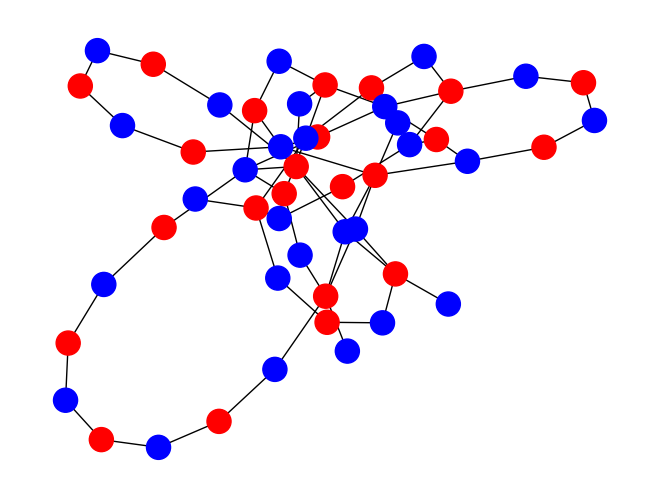

In [29]:
colormap = ['red']*23 + ['blue']*28
nx.draw(g_bipart, node_color=colormap)

In [30]:
cells[1:4]

[{'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3}]

In [31]:
counter_coo[0]

array([1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

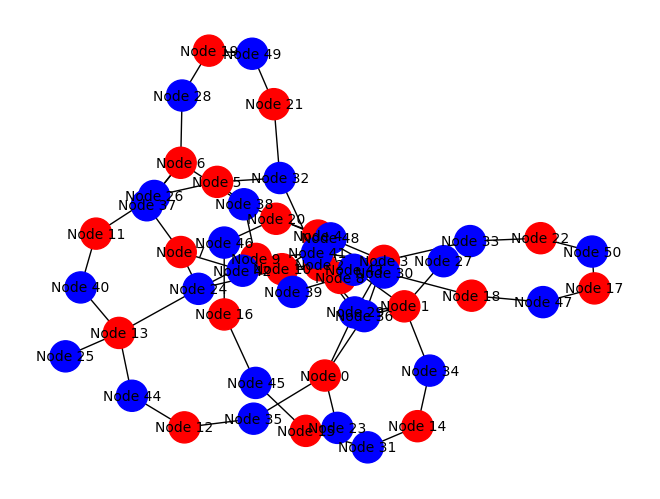

In [32]:
g_bipart.edges(23)
node_labels = {i: f"Node {i}" for i in range(am_bipartite.shape[0])}
pos = nx.spring_layout(g_bipart)
nx.draw(g_bipart, pos, with_labels=True, labels=node_labels, node_color=colormap, node_size=500, font_size=10)

In [33]:
am_bipartite_2 = np.vstack((np.hstack((np.zeros((23,23), dtype=int), counter_coo)),np.hstack((counter_coo.T, np.zeros((28, 28),dtype=int)))))


In [34]:
len((np.hstack((np.zeros((23,23), dtype=int), counter_coo)))[0])

51

In [35]:
print(am_bipartite_2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
counter_coo

array([[1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 3, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 0, 0, 0,
        0, 0, 0, 

In [37]:
counter_coo[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [38]:
design['instances'][7]

{'name': 'U23', 'id': 7, 'xloc': 5760, 'yloc': 7680, 'cell': 48, 'orient': 2}

In [39]:
is_sym(am_bipartite_2)

True

In [40]:
G = nx.from_numpy_array(am_bipartite_2, create_using=nx.DiGraph)

In [41]:
counter_coo[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [42]:
cells[7]

{'name': 'AOI21_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 7}

In [43]:
cells[10]

{'name': 'AOI22_X2',
 'width': 1536,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B1', 'id': 3, 'dir': 0},
  {'name': 'B2', 'id': 4, 'dir': 0},
  {'name': 'ZN', 'id': 5, 'dir': 1}],
 'id': 10}

In [44]:
cells[8]

{'name': 'AOI21_X2',
 'width': 1152,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 8}

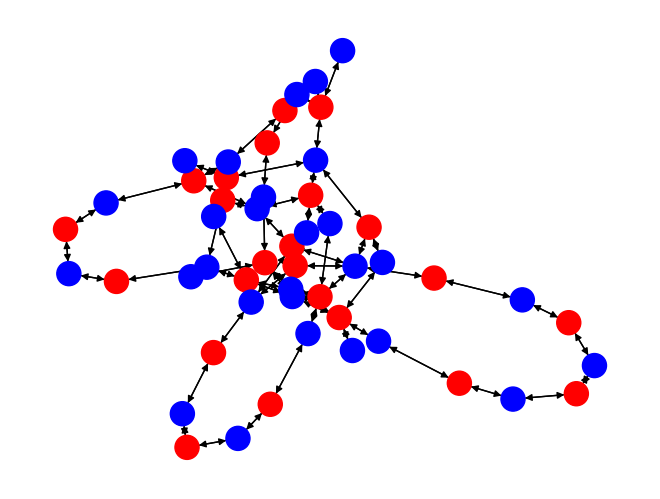

In [45]:
colormap = ['red']*23 + ['blue']*28
nx.draw(G, node_color=colormap)

In [46]:
data=np.load('../data/DigIC_dataset/counter/1/counter_congestion.npz')
lyr=list(data['layerList']).index('M1')
ybl=data['yBoundaryList']
xbl=data['xBoundaryList']

In [47]:
data['demand'][2]

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 2, 3, 3],
       [3, 1, 5, 6, 4],
       [2, 2, 5, 6, 5],
       [0, 1, 3, 3, 2],
       [0, 0, 0, 0, 0]])

In [48]:
data['capacity'][2]

array([[15, 11, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16]])

In [50]:
data = np.load("../data/DigIC_dataset/xbar/1/xbar_congestion.npz")
lyr=list(data['layerList']).index('M1')
ybl=data['yBoundaryList']
xbl=data['xBoundaryList']

In [51]:
data['demand']

array([[[ 0,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 2,  0,  0, ...,  0,  0,  1],
        ...,
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  0,  0,  1]],

       [[ 2,  2,  5, ...,  3,  2,  2],
        [ 3,  2,  4, ...,  2,  1,  0],
        [ 2,  3,  6, ...,  2,  2,  0],
        ...,
        [ 3,  3,  9, ...,  4,  3,  1],
        [ 2,  5,  7, ...,  3,  3,  1],
        [ 0,  1,  2, ...,  1,  1,  1]],

       [[ 2,  0,  3, ...,  1,  0,  1],
        [ 3,  0,  7, ...,  2,  2,  1],
        [ 5,  2,  8, ...,  3, 14, 16],
        ...,
        [ 4,  3,  6, ...,  3,  1,  2],
        [ 1,  3,  5, ...,  1,  2,  1],
        [ 0,  1,  1, ...,  0,  1,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [53]:
with gzip.open("../data/DigIC_dataset/xbar/1/xbar.json.gz", 'rb') as f:
    xbar1 = json.loads(f.read().decode('utf-8'))

In [54]:
xbar1

{'instances': [{'name': 'clk_gate_out_reg/latch',
   'id': 0,
   'xloc': 41984,
   'yloc': 44544,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_0/latch',
   'id': 1,
   'xloc': 41984,
   'yloc': 47616,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_1/latch',
   'id': 2,
   'xloc': 44160,
   'yloc': 44544,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_2/latch',
   'id': 3,
   'xloc': 44160,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_3/latch',
   'id': 4,
   'xloc': 46336,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_4/latch',
   'id': 5,
   'xloc': 44160,
   'yloc': 50688,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_5/latch',
   'id': 6,
   'xloc': 41984,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_6/latch',
   'id': 7,
   'xloc': 44416,
   'yloc': 47616,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_7/latch'

In [56]:
xbar1conn = np.load("../data/DigIC_dataset/xbar/1/xbar_connectivity.npz")

In [57]:
xbar1coo = coo_matrix((xbar1conn['data'], (xbar1conn['row'], xbar1conn['col'])), shape=xbar1conn['shape'])

In [58]:
xbar_coo_arr = xbar1coo.toarray()

In [59]:
xbar_coo_arr.shape

(3952, 4482)

In [60]:
xbar_am = (np.dot(xbar_coo_arr, xbar_coo_arr.T) > 0).astype(int)
np.fill_diagonal(xbar_am, 0)

In [61]:
xbar_am

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0]])

In [62]:
xbar_g = nx.from_numpy_array(xbar_am)

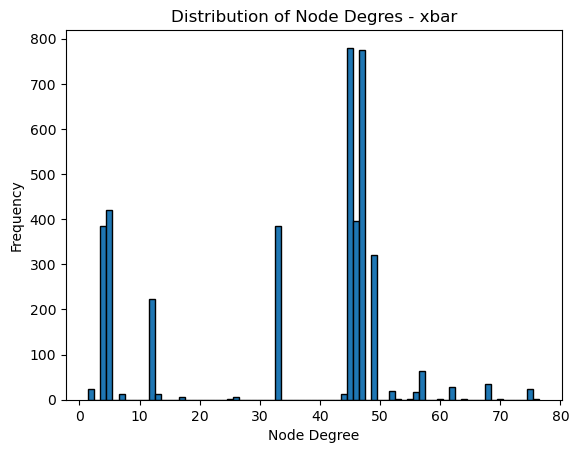

In [63]:
import matplotlib.pyplot as plt

def plot_degree_distribution(graph):
    degree_sequence = [d for n, d in graph.degree()]
    
    plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), align='left', edgecolor='black')
    plt.title('Distribution of Node Degres - xbar')
    plt.xlabel('Node Degree')
    plt.ylabel('Frequency')
    plt.show()

plot_degree_distribution(xbar_g)

(array([13., 11.,  7.,  3.,  6.,  4.,  3.,  1.,  1.,  2.]),
 array([0.        , 0.02358603, 0.04717206, 0.07075808, 0.09434411,
        0.11793014, 0.14151617, 0.16510219, 0.18868822, 0.21227425,
        0.23586028]),
 <BarContainer object of 10 artists>)

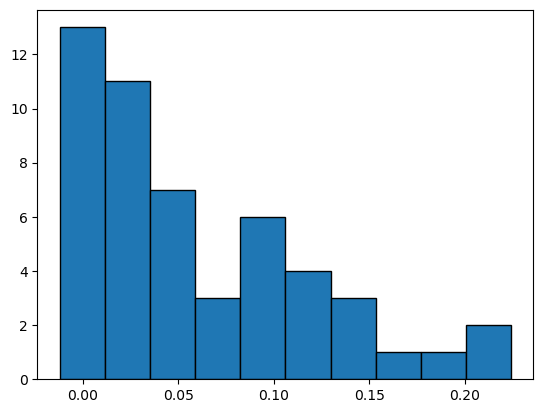

In [64]:
counter_centrality = (list(nx.betweenness_centrality(g_bipart).values()))
plt.hist(counter_centrality, bins=10, align='left', edgecolor='black')


In [65]:
max(counter_centrality)

0.23586027657816386

In [66]:
min(counter_centrality)

0.0

In [67]:
np.percentile(counter_centrality, 75)

0.1094795281749063

In [68]:
np.median(counter_centrality)

0.04817052362070371

In [69]:
np.mean(counter_centrality)

0.07201280512204883

## Raw Data Exploration

In [81]:
with gzip.open('../data/DigIC_dataset/cells.json.gz', 'rt') as file:
    cell_data = json.load(file)

In [82]:
len(cell_data)

80

In [83]:
cell_data[0]

{'name': 'AND2_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'Z', 'id': 3, 'dir': 1}],
 'id': 0}

cells.json.gz stores cell library data.

'terms' are the pins of the cell.

In [84]:
cell_data[1]['terms']

[{'name': 'A1', 'id': 1, 'dir': 0},
 {'name': 'A2', 'id': 2, 'dir': 0},
 {'name': 'Z', 'id': 3, 'dir': 1}]

- 'id' is re

### Counter

#### Features

In [85]:
with gzip.open('../data/DigIC_dataset/counter/1/counter.json.gz', 'rt') as file:
    counter_feature_data = json.load(file)

In [86]:
len(counter_feature_data['instances']), len(counter_feature_data['nets'])

(23, 28)

23 instances and 28 nets in counter

Instances are cells with pins and nets are wires

In [87]:
counter_feature_data['instances'][0]

{'name': 'clk_gate_value_reg/latch',
 'id': 0,
 'xloc': 2560,
 'yloc': 7680,
 'cell': 23,
 'orient': 0}

- name(str): name of the instance
- id(int): index of the instance in the array
    - index just in this chip
- xloc, yloc(int): location of the instance in database units (DBU)
- cell(int): master library cell ID (index)
    - what kind of cell that is being instantiated
- orient(int): number from 0 to 7 for orientation of instance

In [88]:
pd.Series([x['cell'] for x in counter_feature_data['instances']]).value_counts()

17    5
65    3
48    3
7     3
34    2
20    2
23    1
58    1
42    1
21    1
15    1
dtype: int64

different types of cells in counter

In [89]:
[x for x in counter_feature_data['instances'] if x['cell'] == 17]

[{'name': 'ropt_h_inst_941',
  'id': 14,
  'xloc': 4608,
  'yloc': 7680,
  'cell': 17,
  'orient': 6},
 {'name': 'copt_h_inst_791',
  'id': 16,
  'xloc': 4864,
  'yloc': 7680,
  'cell': 17,
  'orient': 0},
 {'name': 'copt_h_inst_793',
  'id': 17,
  'xloc': 7552,
  'yloc': 7680,
  'cell': 17,
  'orient': 6},
 {'name': 'copt_h_inst_796',
  'id': 20,
  'xloc': 4992,
  'yloc': 4608,
  'cell': 17,
  'orient': 0},
 {'name': 'ropt_h_inst_943',
  'id': 22,
  'xloc': 6912,
  'yloc': 4608,
  'cell': 17,
  'orient': 0}]

In [90]:
counter_feature_data['nets'][0]

{'name': 'clock', 'id': 0}

In [91]:
[x['name'] for x in counter_feature_data['nets']]

['clock',
 'reset',
 'dec',
 'zero',
 'test_si',
 'test_so',
 'test_se',
 'copt_net_53',
 'ropt_net_56',
 'aps_rename_1_',
 'value_1_',
 'value_0_',
 'N9',
 'net41',
 'n12',
 'n13',
 'n14',
 'n15',
 'n18',
 'n19',
 'n20',
 'n23',
 'copt_net_49',
 'copt_net_50',
 'copt_net_52',
 'copt_net_55',
 'ropt_net_57',
 'ropt_net_58']

#### Connectivity/Incidence Matrix


In [94]:
data = np.load('../data/DigIC_dataset/counter/1/counter_connectivity.npz')

In [95]:
data.files

['row', 'col', 'data', 'shape']

In [96]:
data['row']

array([ 0,  7,  9, 10, 13, 13,  6, 11,  5,  1,  6, 19,  1,  2,  3,  0,  2,
        8,  4, 18, 15, 14,  5, 21,  2, 22,  3, 14,  1, 12,  0,  1,  2,  3,
        0,  7,  6,  5,  6,  9,  4,  9,  8, 13, 11,  3,  9,  2,  7,  1, 10,
       12, 13, 16, 15, 20, 16, 18, 17,  3, 10,  8,  4, 20, 19, 21, 17, 22])

In [97]:
data['col']

array([ 0,  1,  1,  1,  1,  2,  3,  3,  3,  4,  5,  5,  6,  6,  6,  6,  7,
        7,  7,  7,  8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 13,
       13, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20,
       21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 25, 26, 26, 27, 27])

In [98]:
data['data']

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2,
       1, 1, 6, 1, 6, 1, 6, 2, 2, 5, 5, 5, 4, 2, 4, 2, 2, 2, 3, 1, 3, 2,
       2, 1, 4, 1, 3, 1, 3, 1, 4, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2,
       1, 2])

In [99]:
data['shape']

array([23, 28])

In [100]:
from scipy.sparse import coo_matrix
coo = coo_matrix((data['data'], (data['row'], data['col'])), shape=data['shape'])

In [101]:
coo.toarray()[0]

array([1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Signifies that in this instance/cell (index 0 instance), they are connected to index 0 net/wire at the instance's first pin/terminal. They are also connected to the index 6 net/wire at the instance's 3rd pin. 

The pins indicies just based on order they are (placed) in the instance. Can access pin information from the 'terms' in the instance's cell data (from cells.json.gz).

In [103]:
counter_congestion_data = np.load('../data/DigIC_dataset/counter/1/counter_congestion.npz')

In [104]:
counter_congestion_data.files

['demand', 'capacity', 'xBoundaryList', 'yBoundaryList', 'layerList']

In [105]:
print(counter_congestion_data['layerList'])

['M1' 'MINT1' 'MINT2' 'MINT3' 'MINT4' 'MINT5' 'MSMG1' 'MSMG2' 'MSMG3'
 'MSMG4' 'MSMG5' 'MG1' 'MG2']


In [106]:
ybl = counter_congestion_data['yBoundaryList']
xbl = counter_congestion_data['xBoundaryList']
xbl, ybl

(array([   0, 2048, 3584, 5120, 6656]),
 array([   0, 1536, 3072, 4608, 6144, 7680, 9216]))

In [107]:
def getGRCIndex(x,y,xbl,ybl):
    j=0
    for b in xbl[1:]:
        if x<b:break
        j+=1
    i=0
    for b in ybl[1:]:
        if y<b:break
        i+=1
    return i,j

In [108]:
xloc = 5048
yloc = 3536

In [109]:
getGRCIndex(xloc, yloc, xbl, ybl)

(2, 2)

Global route cell (GRC) is a higher-level representation of a group of cells, most likely partitioned by purpose and physical location.

Used early on in routing process of chip design to predict areas of higher congestion.

In [110]:
def buildBST(array,start=0,finish=-1):
    if finish<0:
        finish = len(array)
    mid = (start + finish) // 2
    if mid-start==1:
        ltl=start
    else:
        ltl=buildBST(array,start,mid)
    if finish-mid==1:
        gtl=mid
    else:
        gtl=buildBST(array,mid,finish)
    return((array[mid],ltl,gtl))
xbst=buildBST(counter_congestion_data['xBoundaryList'])
ybst=buildBST(counter_congestion_data['yBoundaryList'])

In [111]:
def getGRCIndex(x, y, xbst, ybst):
    while (type(xbst)==tuple):
        if x < xbst[0]:
            xbst=xbst[1]
        else:
            xbst=xbst[2]

    while (type(ybst)==tuple):
        if y < ybst[0]:
            ybst=ybst[1]
        else:
            ybst=ybst[2]
    return ybst, xbst

In [112]:
getGRCIndex(5000, 3000, xbst, ybst)

(1, 2)

In [113]:
counter_congestion_data['demand'][3]

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 2, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [114]:
counter_congestion_data['capacity'][3]

array([[11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12],
       [10, 11, 12, 12, 12],
       [11, 12, 12, 12, 12],
       [11, 11, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [11, 11, 12, 12, 12]])

- Demand is the number of wires required to pass through the certain GRC
- Capacity is the number of wires that can pass through without congestion

Each element in the matrix refers to a subsection of the GRC.

How are subsections partitioned? Why are all the GRCs the same shape in counter?

Is it possible different GRCs actually have different sizes, scaled by x and y boundaries. Just arbitrarily separated into 7 by 5 matrices?

In [115]:
counter_congestion_data['demand'][10].shape

(7, 5)

In [116]:
counter_feature_data['instances']

[{'name': 'clk_gate_value_reg/latch',
  'id': 0,
  'xloc': 2560,
  'yloc': 7680,
  'cell': 23,
  'orient': 0},
 {'name': 'value_reg_0_',
  'id': 1,
  'xloc': 512,
  'yloc': 4608,
  'cell': 65,
  'orient': 0},
 {'name': 'value_reg_2_',
  'id': 2,
  'xloc': 768,
  'yloc': 7680,
  'cell': 65,
  'orient': 6},
 {'name': 'value_reg_1_',
  'id': 3,
  'xloc': 3584,
  'yloc': 4608,
  'cell': 65,
  'orient': 6},
 {'name': 'U20', 'id': 4, 'xloc': 7424, 'yloc': 4608, 'cell': 58, 'orient': 6},
 {'name': 'U21', 'id': 5, 'xloc': 6272, 'yloc': 7680, 'cell': 48, 'orient': 6},
 {'name': 'U22', 'id': 6, 'xloc': 6784, 'yloc': 7680, 'cell': 7, 'orient': 6},
 {'name': 'U23', 'id': 7, 'xloc': 5760, 'yloc': 7680, 'cell': 48, 'orient': 2},
 {'name': 'U24', 'id': 8, 'xloc': 6912, 'yloc': 4608, 'cell': 42, 'orient': 4},
 {'name': 'U25', 'id': 9, 'xloc': 6400, 'yloc': 4608, 'cell': 7, 'orient': 4},
 {'name': 'U26',
  'id': 10,
  'xloc': 6272,
  'yloc': 7680,
  'cell': 48,
  'orient': 2},
 {'name': 'U28',
  'id': 

In [117]:
cell_data[0]

{'name': 'AND2_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'Z', 'id': 3, 'dir': 1}],
 'id': 0}